<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#解答例" data-toc-modified-id="解答例-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>解答例</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#2" data-toc-modified-id="2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2</a></span></li><li><span><a href="#3" data-toc-modified-id="3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3</a></span></li><li><span><a href="#別解" data-toc-modified-id="別解-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>別解</a></span></li><li><span><a href="#4" data-toc-modified-id="4-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>4</a></span></li></ul></li></ul></div>

# 解答例


## 1

代入して方程式の解を求める典型的な問題です．

一歩づつ，出力しながら変形していくのがコツ．
数式処理ソフトはやり方を教えないと動かないよ．

```
代入:  subs
展開:  expand
方程式の解: solve(eq, a)
```

sympyでは方程式の解solveに渡す式(eq)=0が成り立つ未知数(a)をとく．eqにはあらかじめ0となるように右辺を移項した式を求めておく必要がある．

In [1]:
from sympy import *
init_session()

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [2]:
x,a = symbols('x a')

In [3]:
P = x*(x+3)*(2*x-3)

In [4]:
P0 = expand(P.subs({x:a+1}))
P0

In [5]:
P1 = expand(P.subs({x:a}))
P1

In [6]:
eq1 = (P0-P1)/2
eq1

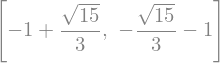

In [7]:
solve(eq1,a)

## 2

高校の一年生の時にやる平方完成ですが，sympyに限らず数式処理ソフトは苦手なようです．微分して頂点の座標を求めて作って行きます．

In [8]:
from sympy import *
init_session()
x = symbols('x')

f = x**2+3*x-2
eq1 = diff(f,x)
eq1

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



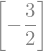

In [9]:
solve(eq1,x)

In [10]:
f.subs({x:-3/2})

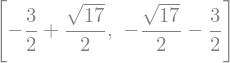

In [11]:
solve(f,x)

In [12]:
def l_y(x, x1):
    m = diff(f,x)
    eq = m.subs({x:x1})*(x-x1)+f.subs({x:x1})
    return eq

print(l_y(x,2))

7*x - 6


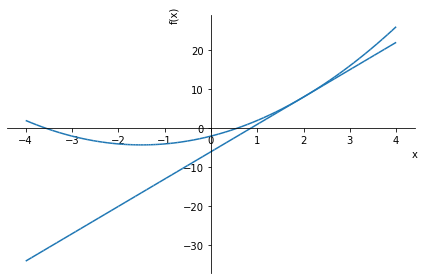

In [13]:
%matplotlib inline
plot(f,l_y(x,2), (x,-4,4))

## 3

頂点を一致させる問題です．1番の問題と本質的には同じなんですが，未知数が二つになったので途端に見通しが悪くなります．

一般の解答例では，紙面の都合上，解の導出を短く表示していますが，解いていく最中では，一つ一つ積み上げていってます．解答例を見ながら，「かっこの中側から打つ」ということの意味を理解して，実践してください．

In [14]:
from sympy import *
#init_session()
init_printing()

まずは二つの曲線の方程式をy1, y2として打ち込みます．変数として宣言しとくことを忘れないように．

In [15]:
x, y,a,b = symbols('x y a b')
y1 = 4*x**2-8*x+5
y2 = -2*(x+a)**2+b

y1の頂点を求めます．微分して傾きがゼロになるxをx0とします．　[0]は配列の中身を取り出すためです．

In [16]:
x0=solve(diff(y1,x),x)[0]
x0

これ(x=x0)をy1に代入して，その値をy0とします．

In [17]:
y0 = y1.subs({x:x0})
y0

x=x0でy2が頂点となるようなa0を求めます．

In [18]:
a0=solve(solve(diff(y2,x),x)[0]-x0,a)[0]
a0

一度にやると上のようですが，これの中身を見て，一つ一つのstepをsympyに教えてやっているのを見盗ってください．

In [19]:
diff(y2,x)

In [20]:
solve(diff(y2,x),x)

In [21]:
solve(diff(y2,x),x)[0]

In [22]:
solve(diff(y2,x),x)[0]-x0

In [23]:
solve(solve(diff(y2,x),x)[0]-x0,a)

In [24]:
solve(solve(diff(y2,x),x)[0]-x0,a)[0]

出てきた答えをそのまま次のステップの代入にして，次々と操作を加えていく様子が見えますでしょうか？　

わからんようになったら，間の結果を変数として取り出して，それを次の式に代入(subs)していくと見やすいです．

In [25]:
b0 =solve((y2-y0).subs({a:a0}).subs({x:x0}),b)[0]
b0

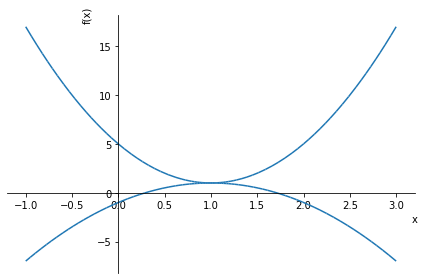

In [26]:
%matplotlib inline
line_1 = y1
line_2 = y2.subs({a:a0}).subs({b:b0})
line_2
plot(line_1, line_2, (x,-1,3))

## 別解
こういった問題では，判別式を使った解法を指導しているというTAさんからの指導(?)があったんで，やって見た．

In [27]:
from sympy import *
init_session()



IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [28]:
x, y,a,b = symbols('x y a b')
y1 = 4*x**2-8*x+5
y2 = -2*(x+a)**2+b

In [29]:
y3 = expand(y1-y2)
y3

In [30]:
cc=y3.coeff(x,0)
bb=y3.coeff(x,1)
aa=y3.coeff(x,2)
print(aa,bb,cc)

6 4*a - 8 2*a**2 - b + 5


In [31]:
expand(bb**2-4*aa*cc)

## 4

頂点を代数式で出す問題で，式変形が必要になる典型的な問題です．factorとかsimplifyとかは試行錯誤が必要です．fractionは分数式での基本となるやり方なんで，idiom的に覚えてください．

```
代入:   subs
展開:   expand
簡単化: simplify
通分:   together
因数分解:factor
分数:   fraction
分母:   d(enominator)
分子:   n(umerator)
```

In [32]:
from sympy import *
#init_session()
init_printing()
x, y,a,b = symbols('x y a b')

y = a*x**2-b*x-a+b

In [33]:
y.subs({x:-2})-6

In [34]:
b0=solve(y.subs({x:-2})-6,b)
b0

In [35]:
df = diff(y,x)
df

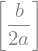

In [36]:
s1 = solve(df,x)
s1

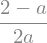

In [37]:
x0 = s1[0].subs({b:b0[0]})
x0

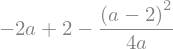

In [38]:
simplify((y.subs({x:x0}).subs({b:b0[0]})))

簡単化しなさいというのに反応していない典型的な例です．まぁ，簡単というのは人間とコンピュータで違うのでしょうね．地道にばらして，教えて行きましょう．

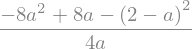

In [39]:
eq2 = together((y.subs({x:x0}).subs({b:b0[0]})))
eq2

In [40]:
n,d = fraction(eq2)

In [41]:
factor(expand(n))

時々sympyとの意見があって，スパッと綺麗にしてくれることがあります．たまにです．嬉しくなりますが．．．

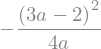

In [42]:
factor(together((y.subs({x:x0}).subs({b:b0[0]}))))